Importing the libraries to plot and visualize the data

In [1]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt 
import seaborn as sns           
%matplotlib inline
plt.style.use('fivethirtyeight')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


ratings file cleaning

In [7]:
ratings_file = r"C:\Users\kamma\Downloads\ratings.csv.zip"

df_ratings = pd.read_csv(ratings_file)

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


movies file cleaning

In [9]:
movies_file = r"C:\Users\kamma\Downloads\movies.csv"

df_movies = pd.read_csv(movies_file)

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


To get our desired information in a single dataframe, we can merge the two dataframes objects on the movieId column since it is common between the two dataframes.
I can do this using the merge() function from the Pandas library, as shown below

In [10]:
movie_data = pd.merge(df_ratings, df_movies, on='movieId')

movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [11]:
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

In [12]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

In [14]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [15]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [16]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [17]:
ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


<Axes: >

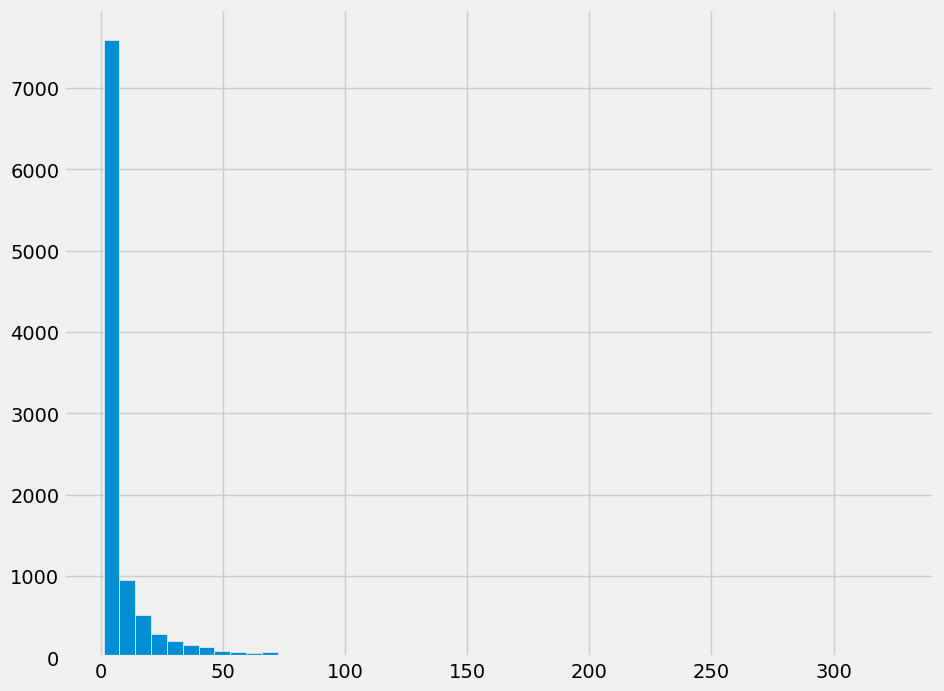

In [18]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Axes: >

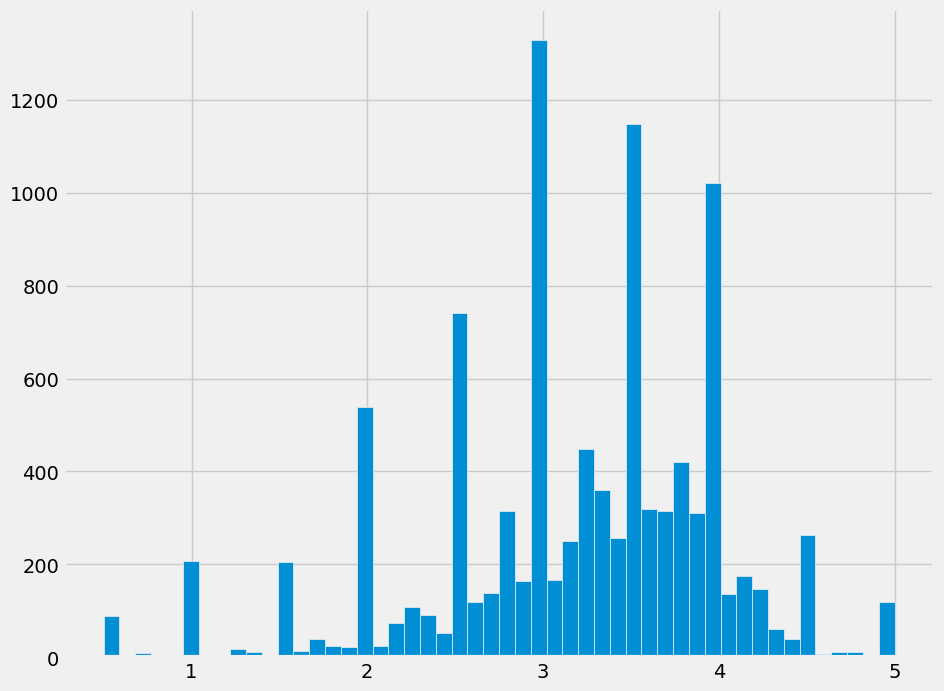

In [19]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 1000x800 with 0 Axes>

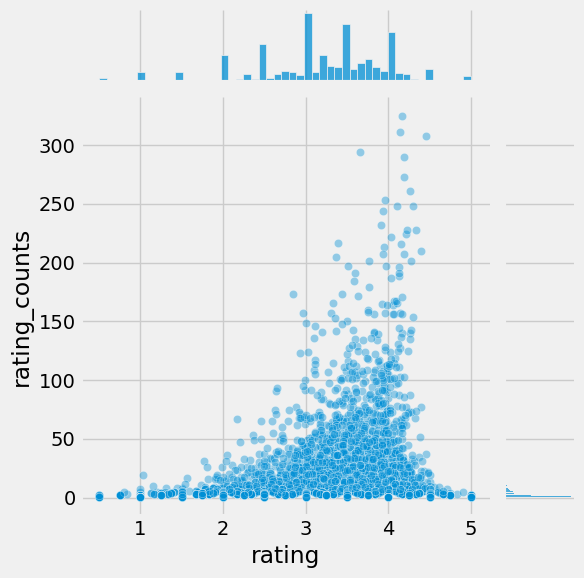

In [20]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [21]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

forrest_gump_ratings.head()

userId
1    3.0
2    NaN
3    3.0
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [ ]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

In [24]:
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.056266
(500) Days of Summer (2009),0.144325
*batteries not included (1987),0.000000
...And Justice for All (1979),0.089924
10 (1979),0.693375


In [25]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Martian Child (2007),1.0
Save the Tiger (1973),1.0
Underworld (1996),1.0
Shortbus (2006),1.0
"Court Jester, The (1956)",1.0
Bottle Shock (2008),1.0
Anna Karenina (2012),1.0
Elegy (2008),1.0
Half Light (2006),1.0


In [26]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.056266,20
(500) Days of Summer (2009),0.144325,37
*batteries not included (1987),0.000000,11
...And Justice for All (1979),0.089924,10
10 (1979),0.693375,3


In [27]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,311
Happy Gilmore (1996),0.715602,79
12 Angry Men (1957),0.545139,63
As Good as It Gets (1997),0.521448,98
First Knight (1995),0.520438,52


Now, we can see from the above output the movies that are highly correlated with Forrest Gump (1994).

The movies in the list are some of the most famous movies Hollywood movies, and since Forest Gump (1994) is also a very famous movie, there is a high chance that these movies are highly correlate